In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import math
from functools import reduce

from sklearn.preprocessing import scale
# import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


%matplotlib inline

import numpy as np
import pandas as pd

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import os
import pandas_datareader.data as web

## Importing SP 500 Index

 - https://finance.yahoo.com/quote/%5EGSPC/

In [2]:
data = web.get_data_yahoo('^GSPC','01/02/1970',interval='m')
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1970-01-01,94.250000,84.419998,92.059998,85.019997,221090000,85.019997
1970-02-01,90.330002,84.639999,85.019997,89.500000,228380000,89.500000
1970-03-01,91.070000,86.190002,89.500000,89.629997,212880000,89.629997
1970-04-01,90.699997,79.309998,89.629997,81.519997,223120000,81.519997
1970-05-01,82.320000,68.610001,81.519997,76.550003,258220000,76.550003


In [3]:
data = data[['Close','Open']]

In [4]:
data['Change'] = data['Close'] - data['Open']

In [5]:
data.head()

,Close,Open,Change
Date,,,
1970-01-01,85.019997,92.059998,-7.040001
1970-02-01,89.500000,85.019997,4.480003
1970-03-01,89.629997,89.500000,0.129997
1970-04-01,81.519997,89.629997,-8.110001
1970-05-01,76.550003,81.519997,-4.969994


In [6]:
data.describe()

,Close,Open,Change
count,609.000000,609.000000,609.000000
mean,855.104122,850.009390,5.094732
std,803.651820,798.368911,50.825065
min,63.540001,63.540001,-389.689941
25%,136.000000,135.759995,-4.709961
50%,533.400024,514.760010,3.449997
75%,1303.819946,1302.880005,16.759995
max,3372.850098,3368.659912,414.349854


In [7]:
# data.loc[(data['Change'] < 0), 'Sell_Hold_Buy'] = 0 # sell
# data.loc[(data['Change'] > 0) & (data['Change'] < 10), 'Sell_Hold_Buy'] = 1 # hold
# data.loc[(data['Change'] > 4), 'Sell_Hold_Buy'] = 2 # buy

In [8]:
data.loc[(data['Change'] < -200), 'Sell_Hold_Buy'] = 0 #strong buy
data.loc[(data['Change'] > -200) & (data['Change'] < 0), 'Sell_Hold_Buy'] = 1 # sell
data.loc[(data['Change'] > 0) & (data['Change'] < 4), 'Sell_Hold_Buy'] = 2 # hold
data.loc[(data['Change'] > 4) & (data['Change'] < 100), 'Sell_Hold_Buy'] = 3 # buy
data.loc[(data['Change'] > 100), 'Sell_Hold_Buy'] = 4 #sell

In [9]:
data['Sell_Hold_Buy'].value_counts()

3.0    276
1.0    240
2.0     74
4.0     12
0.0      5
Name: Sell_Hold_Buy, dtype: int64

In [10]:
data = data.reset_index()
data.head()

,Date,Close,Open,Change,Sell_Hold_Buy
0,1970-01-01,85.019997,92.059998,-7.040001,1.0
1,1970-02-01,89.500000,85.019997,4.480003,3.0
2,1970-03-01,89.629997,89.500000,0.129997,2.0
3,1970-04-01,81.519997,89.629997,-8.110001,1.0
4,1970-05-01,76.550003,81.519997,-4.969994,1.0


In [11]:
data.isnull().sum()

Date             0
Close            0
Open             0
Change           0
Sell_Hold_Buy    2
dtype: int64

In [12]:
data.shape

(609, 5)

In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

Date             0
Close            0
Open             0
Change           0
Sell_Hold_Buy    0
dtype: int64

In [15]:
data.shape

(607, 5)

## Importing US Indicators by months

In [16]:
Unemployment_Rate = web.DataReader('UNRATE', 'fred', start = 1970)
Unemployment_Rate.rename(columns = {'UNRATE':'Unemployment_Rate'},inplace=True)
Unemployment_Rate.shape

(607, 1)

In [17]:
Unemployment_Persons = web.DataReader('UNEMPLOY', 'fred', start = 1970)
Unemployment_Persons.rename(columns = {'UNEMPLOY':'Unemployment_Persons'},inplace=True)
Unemployment_Persons.shape

(607, 1)

In [18]:
Employment_Persons = web.DataReader('CE16OV', 'fred', start = 1970)
Employment_Persons.rename(columns = {'CE16OV':'Employment_Persons'},inplace=True)
Employment_Persons.shape

(607, 1)

In [19]:
Year_Treasury_10 = web.DataReader('GS10', 'fred', start = 1970)
Year_Treasury_10.rename(columns = {'GS10':'Year_Treasury_10'},inplace=True)
Year_Treasury_10.shape

(607, 1)

In [20]:
Funds_rate = web.DataReader('FEDFUNDS', 'fred', start = 1970)
Funds_rate.rename(columns = {'FEDFUNDS':'Funds_rate'},inplace=True)
Funds_rate.shape

(607, 1)

In [21]:
Interest_Rates = web.DataReader('INTDSRUSM193N', 'fred', start = 1970)
Interest_Rates.rename(columns = {'INTDSRUSM193N':'Interest_Rates'},inplace=True)
Interest_Rates.shape

(606, 1)

In [22]:
CPI = web.DataReader('CPIAUCSL', 'fred', start = 1970)
CPI.rename(columns = {'CPIAUCSL':'CPI'},inplace=True)
CPI.shape

(607, 1)

In [23]:
M2 = web.DataReader('M2SL', 'fred', start = 1970)
M2.rename(columns = {'M2SL':'M2'},inplace=True)
M2.shape

(607, 1)

In [24]:
M1 = web.DataReader('M1SL', 'fred', start = 1970)
M1.rename(columns = {'M1SL':'M1'},inplace=True)
M1.shape

(607, 1)

In [25]:
M3 = web.DataReader('MABMM301USM189S', 'fred', start = 1970)
M3.rename(columns = {'MABMM301USM189S':'M3'},inplace=True)
M3.shape

(606, 1)

In [26]:
All_Employees = web.DataReader('PAYEMS', 'fred', start = 1970)
All_Employees.rename(columns = {'PAYEMS':'All_Employees'},inplace=True)
All_Employees.shape

(607, 1)

In [27]:
Industrial_Production_Index = web.DataReader('INDPRO', 'fred', start = 1970)
Industrial_Production_Index.rename(columns = {'INDPRO':'Industrial_Production_Index'},inplace=True)
Industrial_Production_Index.shape

(607, 1)

In [28]:
Treasure_bill_3M = web.DataReader('TB3MS', 'fred', start = 1970)
Treasure_bill_3M.rename(columns = {'TB3MS':'Treasure_bill_3M'},inplace=True)
Treasure_bill_3M.shape

(607, 1)

In [29]:
Personal_savings_rate = web.DataReader('PSAVERT', 'fred', start = 1970)
Personal_savings_rate.rename(columns = {'PSAVERT':'Personal_savings_rate'},inplace=True)
Personal_savings_rate.shape

(606, 1)

In [30]:
Personal_Consumption_Expenditures = web.DataReader('PCE', 'fred', start = 1970)
Personal_Consumption_Expenditures.rename(columns = {'PCE':'Personal_Consumption_Expenditures'},inplace=True)
Personal_Consumption_Expenditures.shape

(606, 1)

In [31]:
Housing_Starts = web.DataReader('HOUST', 'fred', start = 1970)
Housing_Starts.rename(columns = {'HOUST':'Housing_Starts'},inplace=True)
Housing_Starts.shape

(606, 1)

In [32]:
Labor_Force_Participation_Rate = web.DataReader('CIVPART', 'fred', start = 1970)
Labor_Force_Participation_Rate.rename(columns = {'CIVPART':'Labor_Force_Participation_Rate'},inplace=True)
Labor_Force_Participation_Rate.shape

(607, 1)

In [33]:
# Consumer_sentiment = web.DataReader('UMCSENT', 'fred', start = 1970)
# Consumer_sentiment.rename(columns = {'UMCSENT':'Consumer_sentiment'},inplace=True)
# Consumer_sentiment.shape

In [34]:
Commercial_and_Industrial_Loans = web.DataReader('BUSLOANS', 'fred', start = 1970)
Commercial_and_Industrial_Loans.rename(columns = {'BUSLOANS':'Commercial_and_Industrial_Loans'},inplace=True)
Commercial_and_Industrial_Loans.shape

(607, 1)

In [35]:
Real_Disposable_Personal_Income = web.DataReader('DSPIC96', 'fred', start = 1970)
Real_Disposable_Personal_Income.rename(columns = {'DSPIC96':'Real_Disposable_Personal_Income'},inplace=True)
Real_Disposable_Personal_Income.shape

(606, 1)

In [36]:
Bank_Prime_Loan_Rate = web.DataReader('MPRIME', 'fred', start = 1970)
Bank_Prime_Loan_Rate.rename(columns = {'MPRIME':'Bank_Prime_Loan_Rate'},inplace=True)
Bank_Prime_Loan_Rate.shape

(607, 1)

In [37]:
New_Private_Housing_Building_Permits = web.DataReader('PERMIT', 'fred', start = 1970)
New_Private_Housing_Building_Permits.rename(columns = {'PERMIT':'New_Private_Housing_Building_Permits'},inplace=True)
New_Private_Housing_Building_Permits.shape

(606, 1)

In [38]:
Motor_Vehicle_Retail_Sales = web.DataReader('HTRUCKSSAAR', 'fred', start = 1970)
Motor_Vehicle_Retail_Sales.rename(columns = {'HTRUCKSSAAR':'Motor_Vehicle_Retail_Sales'},inplace=True)
Motor_Vehicle_Retail_Sales.shape

(607, 1)

In [39]:
Currency_in_Circulation = web.DataReader('CURRCIR', 'fred', start = 1970)
Currency_in_Circulation.rename(columns = {'CURRCIR':'Currency_in_Circulation'},inplace=True)
Currency_in_Circulation.shape

(607, 1)

In [40]:
WTI = web.DataReader('WTISPLC', 'fred', start = 1970)
WTI.rename(columns = {'WTISPLC':'WTI'},inplace=True)
WTI.shape

(607, 1)

In [41]:
Population = web.DataReader('POPTHM', 'fred', start = 1970)
Population.rename(columns = {'POPTHM':'Population'},inplace=True)
Population.shape

(606, 1)

In [42]:
Bank_Credit = web.DataReader('LOANINV', 'fred', start = 1970)
Bank_Credit.rename(columns = {'LOANINV':'Bank_Credit'},inplace=True)
Bank_Credit.shape

(607, 1)

In [43]:
Leading_Indicators_OECD = web.DataReader('USALORSGPNOSTSAM', 'fred', start = 1970)
Leading_Indicators_OECD.rename(columns = {'USALORSGPNOSTSAM':'Leading_Indicators_OECD'},inplace=True)
Leading_Indicators_OECD.shape

(605, 1)

In [44]:
Personal_Saving = web.DataReader('PMSAVE', 'fred', start = 1970)
Personal_Saving.rename(columns = {'PMSAVE':'Personal_Saving'},inplace=True)
Personal_Saving.shape

(606, 1)

In [45]:
Demand_Deposits = web.DataReader('DEMDEPSL', 'fred', start = 1970)
Demand_Deposits.rename(columns = {'DEMDEPSL':'Demand_Deposits'},inplace=True)
Demand_Deposits.shape

(607, 1)

## Merging into one dataset

In [46]:
df = data.merge(Unemployment_Rate, how='left', 
                            left_on='Date', right_on='DATE').merge(Unemployment_Persons, how='left', 
                            left_on='Date', right_on='DATE').merge(Employment_Persons, how='left',
                            left_on='Date', right_on='DATE').merge(Year_Treasury_10, how='left',
                            left_on='Date', right_on='DATE').merge(Funds_rate, how='left',
                            left_on='Date', right_on='DATE').merge(Interest_Rates, how='left',
                            left_on='Date', right_on='DATE').merge(CPI, how='left', 
                            left_on='Date', right_on='DATE').merge(M2, how='left',
                            left_on='Date', right_on='DATE').merge(M1, how='left',
                            left_on='Date', right_on='DATE').merge(M3, how='left',
                            left_on='Date', right_on='DATE').merge(All_Employees, how='left',                                                                   
                            left_on='Date', right_on='DATE').merge(Industrial_Production_Index, how='left', 
                            left_on='Date', right_on='DATE').merge(Treasure_bill_3M, how='left',
                            left_on='Date', right_on='DATE').merge(Personal_savings_rate, how='left',
                            left_on='Date', right_on='DATE').merge(Personal_Consumption_Expenditures, how='left',
                            left_on='Date', right_on='DATE').merge(Housing_Starts, how='left',
                            left_on='Date', right_on='DATE').merge(Labor_Force_Participation_Rate, how='left', 
                            left_on='Date', right_on='DATE').merge(Commercial_and_Industrial_Loans, how='left',
                            left_on='Date', right_on='DATE').merge(Real_Disposable_Personal_Income, how='left',
                            left_on='Date', right_on='DATE').merge(Bank_Prime_Loan_Rate, how='left',                                                                     
                            left_on='Date', right_on='DATE').merge(New_Private_Housing_Building_Permits, how='left', 
                            left_on='Date', right_on='DATE').merge(Motor_Vehicle_Retail_Sales, how='left',
                            left_on='Date', right_on='DATE').merge(Currency_in_Circulation, how='left',
                            left_on='Date', right_on='DATE').merge(WTI, how='left',
                            left_on='Date', right_on='DATE').merge(Population, how='left',
                            left_on='Date', right_on='DATE').merge(Bank_Credit, how='left',
                            left_on='Date', right_on='DATE').merge(Leading_Indicators_OECD, how='left',
                            left_on='Date', right_on='DATE').merge(Personal_Saving, how='left',
                            left_on='Date', right_on='DATE').merge(Demand_Deposits, how='left',
                            left_on='Date', right_on='DATE')    

In [47]:
df.head()

,Date,Close,Open,Change,Sell_Hold_Buy,Unemployment_Rate,Unemployment_Persons,Employment_Persons,Year_Treasury_10,Funds_rate,...,Bank_Prime_Loan_Rate,New_Private_Housing_Building_Permits,Motor_Vehicle_Retail_Sales,Currency_in_Circulation,WTI,Population,Bank_Credit,Leading_Indicators_OECD,Personal_Saving,Demand_Deposits
0,1970-01-01,85.019997,92.059998,-7.040001,1.0,3.9,3201.0,78780.0,7.79,8.98,...,8.50,1062.0,0.332,52.737,3.35,203929.0,398.5684,99.381221,86.3,159.3
1,1970-02-01,89.500000,85.019997,4.480003,3.0,4.2,3453.0,78698.0,7.24,8.98,...,8.50,1118.0,0.379,52.112,3.35,204082.0,396.2011,99.156183,86.1,158.0
2,1970-03-01,89.629997,89.500000,0.129997,2.0,4.4,3635.0,78863.0,7.07,7.76,...,8.39,1132.0,0.351,52.411,3.35,204246.0,398.7779,98.963485,92.4,158.5
3,1970-04-01,81.519997,89.629997,-8.110001,1.0,4.6,3797.0,78930.0,7.39,8.10,...,8.00,1224.0,0.347,52.867,3.35,204504.0,402.5058,98.801924,100.3,159.3
4,1970-05-01,76.550003,81.519997,-4.969994,1.0,4.8,3919.0,78564.0,7.91,7.94,...,8.00,1328.0,0.336,53.490,3.35,204719.0,402.4179,98.666184,93.2,159.4


In [48]:
# df.to_excel("output10.xlsx")

## Data cleaning

In [49]:
df.isnull().sum()

Date                                    0
Close                                   0
Open                                    0
Change                                  0
Sell_Hold_Buy                           0
Unemployment_Rate                       2
Unemployment_Persons                    2
Employment_Persons                      2
Year_Treasury_10                        2
Funds_rate                              2
Interest_Rates                          3
CPI                                     2
M2                                      2
M1                                      2
M3                                      3
All_Employees                           2
Industrial_Production_Index             2
Treasure_bill_3M                        2
Personal_savings_rate                   3
Personal_Consumption_Expenditures       3
Housing_Starts                          3
Labor_Force_Participation_Rate          2
Commercial_and_Industrial_Loans         2
Real_Disposable_Personal_Income   

In [50]:
df.shape

(607, 34)

In [51]:
df = df.iloc[0:603]

In [52]:
df.isnull().sum()

Date                                    0
Close                                   0
Open                                    0
Change                                  0
Sell_Hold_Buy                           0
Unemployment_Rate                       0
Unemployment_Persons                    0
Employment_Persons                      0
Year_Treasury_10                        0
Funds_rate                              0
Interest_Rates                          0
CPI                                     0
M2                                      0
M1                                      0
M3                                      0
All_Employees                           0
Industrial_Production_Index             0
Treasure_bill_3M                        0
Personal_savings_rate                   0
Personal_Consumption_Expenditures       0
Housing_Starts                          0
Labor_Force_Participation_Rate          0
Commercial_and_Industrial_Loans         0
Real_Disposable_Personal_Income   

In [53]:
# df.to_excel("output10.xlsx")

## Correlation analysis

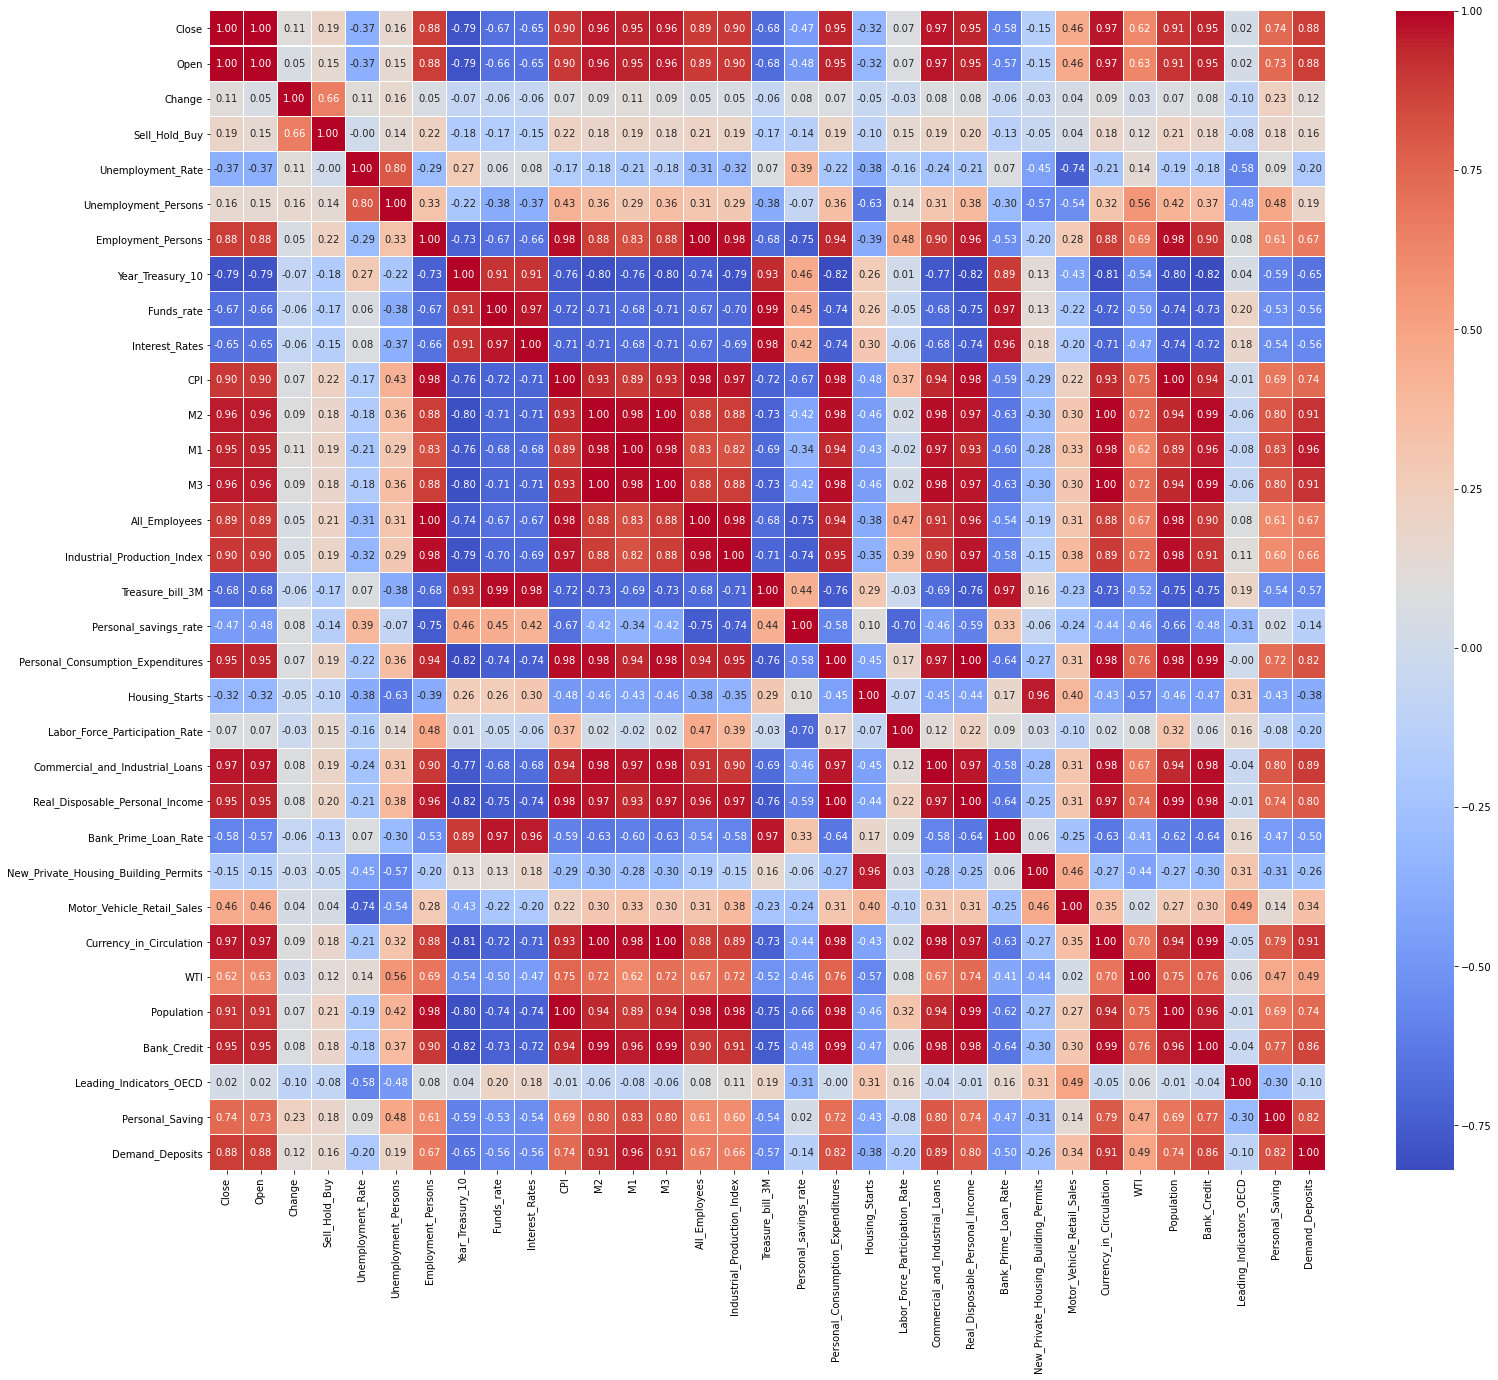

In [54]:
f, ax = plt.subplots(figsize=(25, 20))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

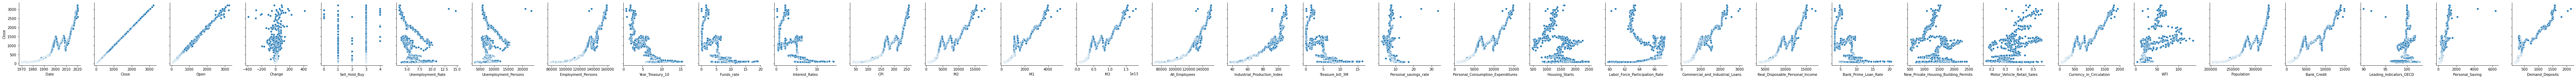

In [55]:
sns.pairplot(data=df, x_vars=df.columns, y_vars = 'Close', height=3)

## Data standartization

In [56]:
df.head()

,Date,Close,Open,Change,Sell_Hold_Buy,Unemployment_Rate,Unemployment_Persons,Employment_Persons,Year_Treasury_10,Funds_rate,...,Bank_Prime_Loan_Rate,New_Private_Housing_Building_Permits,Motor_Vehicle_Retail_Sales,Currency_in_Circulation,WTI,Population,Bank_Credit,Leading_Indicators_OECD,Personal_Saving,Demand_Deposits
0,1970-01-01,85.019997,92.059998,-7.040001,1.0,3.9,3201.0,78780.0,7.79,8.98,...,8.50,1062.0,0.332,52.737,3.35,203929.0,398.5684,99.381221,86.3,159.3
1,1970-02-01,89.500000,85.019997,4.480003,3.0,4.2,3453.0,78698.0,7.24,8.98,...,8.50,1118.0,0.379,52.112,3.35,204082.0,396.2011,99.156183,86.1,158.0
2,1970-03-01,89.629997,89.500000,0.129997,2.0,4.4,3635.0,78863.0,7.07,7.76,...,8.39,1132.0,0.351,52.411,3.35,204246.0,398.7779,98.963485,92.4,158.5
3,1970-04-01,81.519997,89.629997,-8.110001,1.0,4.6,3797.0,78930.0,7.39,8.10,...,8.00,1224.0,0.347,52.867,3.35,204504.0,402.5058,98.801924,100.3,159.3
4,1970-05-01,76.550003,81.519997,-4.969994,1.0,4.8,3919.0,78564.0,7.91,7.94,...,8.00,1328.0,0.336,53.490,3.35,204719.0,402.4179,98.666184,93.2,159.4


In [57]:
columns=df.drop(columns = ['Date','Open','Close','Sell_Hold_Buy']).columns

In [58]:
df1 = df.drop(columns = ['Date','Open','Close','Sell_Hold_Buy'])

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)

StandardScaler()

In [60]:
df1 = scaler.transform(df1)

In [61]:
pd.DataFrame(df1, columns=columns).describe()

,Change,Unemployment_Rate,Unemployment_Persons,Employment_Persons,Year_Treasury_10,Funds_rate,Interest_Rates,CPI,M2,M1,...,Bank_Prime_Loan_Rate,New_Private_Housing_Building_Permits,Motor_Vehicle_Retail_Sales,Currency_in_Circulation,WTI,Population,Bank_Credit,Leading_Indicators_OECD,Personal_Saving,Demand_Deposits
count,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,603.000000,6.030000e+02,...,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02
mean,5.891731e-18,4.242046e-16,-4.713385e-17,9.426769e-17,2.356692e-16,-1.414015e-16,9.426769e-17,-1.885354e-16,0.000000,-1.414015e-16,...,-2.828031e-16,-1.060512e-16,-4.713385e-17,9.426769e-17,1.885354e-16,9.426769e-17,-9.426769e-17,-3.558605e-15,-1.885354e-16,-2.356692e-16
std,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830,1.000830e+00,...,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00
min,-7.814449e+00,-1.636570e+00,-1.920344e+00,-1.885757e+00,-1.830315e+00,-1.293093e+00,-1.487693e+00,-1.665930e+00,-1.116587,-1.047006e+00,...,-1.227416e+00,-2.162242e+00,-2.081712e+00,-1.039892e+00,-1.178986e+00,-1.631798e+00,-1.108488e+00,-7.561166e+00,-9.083058e-01,-7.912816e-01
25%,-1.878888e-01,-7.319206e-01,-6.028461e-01,-9.376993e-01,-7.770542e-01,-8.587449e-01,-8.367561e-01,-7.664811e-01,-0.803212,-7.908352e-01,...,-7.913931e-01,-6.996676e-01,-6.915103e-01,-8.381839e-01,-6.983808e-01,-8.849043e-01,-8.607690e-01,-4.297871e-01,-5.055773e-01,-5.597200e-01
50%,-3.043269e-02,-2.494411e-01,-1.833682e-01,1.377802e-01,-1.772698e-02,3.173194e-02,5.828206e-02,4.723440e-02,-0.402183,-1.690933e-01,...,7.982914e-03,1.558780e-02,-8.962207e-02,-3.133942e-01,-3.140808e-01,-2.956139e-02,-3.770090e-01,1.628083e-02,-2.499303e-01,-3.874340e-01
75%,2.375109e-01,6.552079e-01,2.523826e-01,8.225768e-01,5.734052e-01,5.532054e-01,4.976644e-01,9.227983e-01,0.558260,1.308075e-01,...,4.440062e-01,7.024796e-01,6.933653e-01,5.300095e-01,5.000366e-01,9.231474e-01,9.484810e-01,5.901028e-01,8.926462e-02,-1.651502e-01
max,8.120220e+00,5.118143e+00,6.066211e+00,1.619882e+00,2.957529e+00,3.588514e+00,2.987498e+00,1.660377e+00,3.122426,3.788676e+00,...,3.786851e+00,2.538713e+00,2.222055e+00,2.828247e+00,3.535922e+00,1.626189e+00,2.569132e+00,2.260873e+00,1.367277e+01,4.344826e+00


In [62]:
df1 = pd.DataFrame(df1, columns=columns)
df1.head()

,Change,Unemployment_Rate,Unemployment_Persons,Employment_Persons,Year_Treasury_10,Funds_rate,Interest_Rates,CPI,M2,M1,...,Bank_Prime_Loan_Rate,New_Private_Housing_Building_Permits,Motor_Vehicle_Retail_Sales,Currency_in_Circulation,WTI,Population,Bank_Credit,Leading_Indicators_OECD,Personal_Saving,Demand_Deposits
0,-0.230994,-1.39533,-1.920344,-1.869753,0.498289,0.995241,0.38375,-1.665930,-1.115777,-1.045804,...,0.298665,-0.808189,-0.238763,-1.038605,-1.177542,-1.631798,-1.107885,-0.427541,-0.907840,-0.787931
1,-0.002687,-1.21440,-1.819091,-1.873328,0.318663,0.995241,0.38375,-1.662922,-1.116587,-1.047006,...,0.298665,-0.670071,0.261923,-1.039892,-1.177542,-1.627841,-1.108488,-0.597552,-0.908306,-0.791282
2,-0.088897,-1.09378,-1.745964,-1.866133,0.263142,0.682613,0.38375,-1.659914,-1.116341,-1.046304,...,0.266690,-0.635541,-0.036358,-1.039276,-1.177542,-1.623599,-1.107832,-0.743131,-0.893644,-0.789993
3,-0.252199,-0.97316,-1.680872,-1.863211,0.367652,0.769739,0.38375,-1.656906,-1.116072,-1.045303,...,0.153324,-0.408633,-0.078969,-1.038337,-1.177542,-1.616927,-1.106883,-0.865186,-0.875259,-0.787931
4,-0.189970,-0.85254,-1.631853,-1.879172,0.537480,0.728738,0.38375,-1.655401,-1.115311,-1.044802,...,0.153324,-0.152127,-0.196151,-1.037054,-1.177542,-1.611366,-1.106905,-0.967735,-0.891782,-0.787674


In [63]:
df1['Sell_Hold_Buy'] = df['Sell_Hold_Buy']

In [64]:
df1

,Change,Unemployment_Rate,Unemployment_Persons,Employment_Persons,Year_Treasury_10,Funds_rate,Interest_Rates,CPI,M2,M1,...,New_Private_Housing_Building_Permits,Motor_Vehicle_Retail_Sales,Currency_in_Circulation,WTI,Population,Bank_Credit,Leading_Indicators_OECD,Personal_Saving,Demand_Deposits,Sell_Hold_Buy
0,-0.230994,-1.395330,-1.920344,-1.869753,0.498289,0.995241,0.383750,-1.665930,-1.115777,-1.045804,...,-0.808189,-0.238763,-1.038605,-1.177542,-1.631798,-1.107885,-0.427541,-0.907840,-0.787931,1.0
1,-0.002687,-1.214400,-1.819091,-1.873328,0.318663,0.995241,0.383750,-1.662922,-1.116587,-1.047006,...,-0.670071,0.261923,-1.039892,-1.177542,-1.627841,-1.108488,-0.597552,-0.908306,-0.791282,3.0
2,-0.088897,-1.093780,-1.745964,-1.866133,0.263142,0.682613,0.383750,-1.659914,-1.116341,-1.046304,...,-0.635541,-0.036358,-1.039276,-1.177542,-1.623599,-1.107832,-0.743131,-0.893644,-0.789993,2.0
3,-0.252199,-0.973160,-1.680872,-1.863211,0.367652,0.769739,0.383750,-1.656906,-1.116072,-1.045303,...,-0.408633,-0.078969,-1.038337,-1.177542,-1.616927,-1.106883,-0.865186,-0.875259,-0.787931,1.0
4,-0.189970,-0.852540,-1.631853,-1.879172,0.537480,0.728738,0.383750,-1.655401,-1.115311,-1.044802,...,-0.152127,-0.196151,-1.037054,-1.177542,-1.611366,-1.106905,-0.967735,-0.891782,-0.787674,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-0.470991,-1.576260,-0.839104,1.616001,-1.471063,-0.908714,-0.836756,1.656917,2.517063,2.729931,...,0.360884,0.986320,2.558746,0.777798,1.614007,2.325368,0.003529,1.844351,2.875047,1.0
599,-5.669123,-1.636570,-0.881293,1.617963,-1.555977,-0.901026,-0.836756,1.660377,2.528051,2.757983,...,0.119177,1.007626,2.552566,0.525846,1.616697,2.341400,0.018271,2.132463,2.930199,0.0
600,-7.814449,-1.093780,-0.337659,1.487706,-1.761730,-1.139341,-1.487693,1.643877,2.661224,3.011849,...,-0.083068,0.421717,2.614573,-0.244090,1.619567,2.461033,-3.705756,3.826925,3.474762,0.0
601,8.120220,5.118143,6.066211,0.512241,-1.830315,-1.293093,-1.487693,1.613028,2.914058,3.553744,...,-0.798324,-0.089622,2.740926,-0.701070,1.622723,2.554573,-6.239376,13.672769,4.038654,4.0


In [65]:
# pd.DataFrame(scaler.inverse_transform(df1), columns=columns).head()

## Droping features

In [66]:
df1 = df1.drop(columns = ['Change','Bank_Credit','Year_Treasury_10','M2','Unemployment_Rate','Unemployment_Persons','Funds_rate','Interest_Rates','Treasure_bill_3M','Personal_savings_rate','Housing_Starts','Labor_Force_Participation_Rate','Bank_Prime_Loan_Rate','New_Private_Housing_Building_Permits','Motor_Vehicle_Retail_Sales','Leading_Indicators_OECD'])

In [67]:
df1['Sell_Hold_Buy'] = df1['Sell_Hold_Buy'].astype(float)

## Model

In [68]:
X1, y1 = df1.drop(columns = ['Sell_Hold_Buy']), df1['Sell_Hold_Buy']

In [69]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 20)

In [70]:
n_features = len(X1.columns)
num_classes = y1.nunique()

In [71]:
model1 = Sequential()
model1.add(keras.Input(shape=(n_features,)))
model1.add(keras.layers.Dense(512, activation='relu'))
model1.add(keras.layers.Dropout(0.3)) # isjungia tam tikrus neuronus. Tam reikalinga tam, kad nebutu overtfitinimas. Kiekviena epocha vis atskirai
model1.add(keras.layers.Dense(256, activation='relu'))
model1.add(keras.layers.Dropout(0.3))
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dropout(0.3))
model1.add(Dense(num_classes, activation='softmax'))

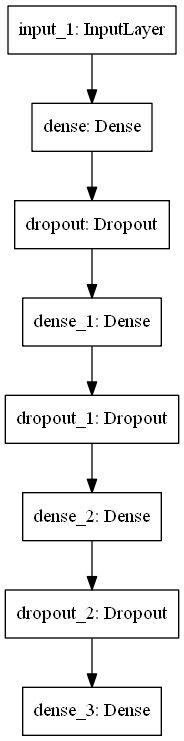

In [72]:
keras.utils.plot_model(model1)

In [73]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               7680      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 6

In [74]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
filepath = "best_model.hdf5"
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
model1.fit(x_train1, y_train1,
          batch_size=10,
          validation_split=0.2,
          epochs=100,
          verbose=1,
          callbacks=[checkpoint])

Epoch 1/100
 1/34 [..............................] - ETA: 0s - loss: 1.6916 - accuracy: 0.2000
Epoch 00001: val_loss improved from inf to 1.16366, saving model to best_model.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 1.2669 - accuracy: 0.4659 - val_loss: 1.1637 - val_accuracy: 0.5059
Epoch 2/100
 1/34 [..............................] - ETA: 0s - loss: 1.0070 - accuracy: 0.5000
Epoch 00002: val_loss improved from 1.16366 to 1.09303, saving model to best_model.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 1.0367 - accuracy: 0.4955 - val_loss: 1.0930 - val_accuracy: 0.4824
Epoch 3/100
 1/34 [..............................] - ETA: 0s - loss: 1.1733 - accuracy: 0.2000
Epoch 00003: val_loss improved from 1.09303 to 1.04975, saving model to best_model.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 1.0204 - accuracy: 0.5223 - val_loss: 1.0497 - val_accuracy: 0.4471
Epoch 4/100
 1/34 [..............................] - ETA: 0s - loss:

In [76]:
model1.evaluate(x_test1, y_test1)

6/6 [==============================] - 0s 831us/step - loss: 0.9803 - accuracy: 0.5580


[0.9803085923194885, 0.5580110549926758]